nlp 保留所有的名词，再用one hot vector

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from collections import  Counter
import cv2
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/COMP5329S1A2Dataset/train.csv')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
labels = df['Labels'].tolist()
label_combination=[]
label_list=[]

for label in labels:
    num_label=[int(i) for i in label.split()]
    label_list.append(sorted(num_label))
    sort_label=[str(i)for i in sorted(num_label)]
    label_combination.append(' '.join(sort_label))

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(label_list)
y = mlb.transform(label_list)

print(y[:5])
print()
df.Labels.head()



[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]]



0         1
1      1 19
2         1
3    8 3 13
4     8 3 7
Name: Labels, dtype: object

In [4]:
reviews_train=df['Caption']

# Remove punctuation/number, and converting to lower cae
import re
def remove_punctuation(x):
    x = re.sub(r'[^a-zA-Z\s]',' ',x.lower())
    # replace more than two continuous space with single space
    # So for the condition of no space between word and punctuation,
    # there is one space between word and punctuation even after punctuation removal
    x =re.sub(' +', ' ', x)
    return x
    
punc_train = [remove_punctuation(s) for s in reviews_train]
# punc_test = [remove_punctuation(s) for s in reviews_test]

# Tokenization the texts
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
token_train = [word_tokenize(s) for s in punc_train]
# token_test = [word_tokenize(s) for s in punc_test]


nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')

def remove_stopwords(x):
  x = [w for w in x if not w in stop_words]
  return x

stopword_train= [remove_stopwords(s) for s in token_train]
# stopword_test= [remove_stopwords(s) for s in token_test]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
type(punc_train)

list

In [0]:
train_data=stopword_train
# caption sentence words count
cpt_len=[len(s) for s in train_data]

In [6]:
from collections import Counter
Counter(cpt_len)

Counter({1: 1,
         2: 17,
         3: 654,
         4: 3784,
         5: 8789,
         6: 8738,
         7: 4883,
         8: 1969,
         9: 690,
         10: 243,
         11: 102,
         12: 61,
         13: 26,
         14: 15,
         15: 8,
         16: 7,
         17: 3,
         18: 3,
         19: 2,
         20: 1,
         22: 1,
         23: 1,
         24: 1,
         28: 1})

In [9]:
def listToStr(s):
   s= ' '.join([str(elem) for elem in s]) 
   return s

str_train=[listToStr(s) for s in train_data]

sequence_train =" ".join(str_train).split()

word_list=list(set(sequence_train))

word_dict = {w: i for i, w in enumerate(word_list)}

# Calculate max word length for later adding pad
word_length_list = [len(w) for w in word_list]
max_word_len=max(word_length_list)
voc_size = len(word_list)
print('voc_size is:',voc_size)

voc_size is: 6899


There are 26 words with frequency higher than 1000.


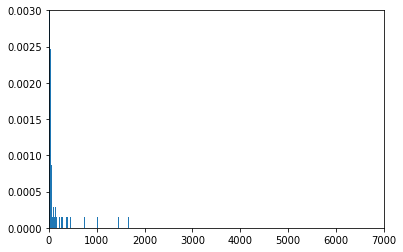

In [10]:
# This function would count word appearance
def count_fre(data):
  cnt={}
  for s in data:
    for w in s:
        try:
          cnt[w]+=1 
        except:
          cnt[w]=1
  return cnt



# Calculate 50,000 text words appearance
fre_list=count_fre(train_data)
fre=[]
for i in fre_list.keys():
  fre.append(fre_list[i])



# Plot histogram, X axis is appearance rate
# Y axis is the percent of words with this appearance rate in whole word list
plt.hist(fre, bins=5000, weights= [1./ len(fre)] * len(fre))
plt.axis([0, 7000, 0, 0.003])



# Calculate the quantity of words more than threshold appearance rate
def fre_percent(fre,thresh):
  cnt_thresh=0
  for i in fre:
    if i>thresh:
      cnt_thresh+=1
  return cnt_thresh

thresh=1000
print('There are %d words with frequency higher than %d.' %(fre_percent(fre,thresh),thresh,))



# Remove all the words lower than 1500 apearance.
# def remove_HF_word(data):
#   removed=[]
#   for s in data:
#     s=[w for w in s if fre_list[w]>1500]
#     removed.append(s)
#   return removed

# remove_HF_train=remove_HF_word(remove_long_word_train)
# remove_HF_test=remove_HF_word(remove_long_word_test)

In [0]:
fre_list

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

cpt_tfidf = tfidf_vectorizer.fit_transform(str_train)
# xval_tfidf = tfidf_vectorizer.transform(xval)


In [43]:
cpt_train, cpt_val, lab_train, lab_val = train_test_split(cpt_tfidf, y, test_size=0.2, random_state=9)
print(cpt_train.shape)
print(cpt_val.shape)
print(lab_train.shape)
print(lab_val.shape)

(24000, 6885)
(6000, 6885)
(24000, 18)
(6000, 18)


In [72]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(cpt_train, lab_train)

# make predictions for validation set
cpt_val_pred = clf.predict(cpt_val)

# evaluate performance
from sklearn.metrics import fbeta_score
print('Overall F1-Score(samples): ',fbeta_score(lab_val, cpt_val_pred,beta=1, average='samples'))

cpt_f1=fbeta_score(lab_val, cpt_val_pred,beta=1, average=None)
count_label=[int(i) for i in ' '.join(labels).split()]
label_dic=list(set(count_label))
print('\nLabel   F1-score')
for i in range(len(label_dic)):
  print(' ',label_dic[i],' '*4,round(cpt_f1[i],4))




Overall F1-Score(samples):  0.8378978835978835

Label   F1-score
  1      0.9347
  2      0.4848
  3      0.4405
  4      0.7122
  5      0.9037
  6      0.7675
  7      0.8698
  8      0.4737
  9      0.6686
  10      0.4306
  11      0.7302
  13      0.6162
  14      0.6753
  15      0.5037
  16      0.6375
  17      0.9062
  18      0.8482
  19      0.9107
